# Entregável 1 - visão computacional

In [1]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t
print ("OpenCV Version : %s " % cv2.__version__)

OpenCV Version : 3.4.0 


# Equalização de histograma

In [2]:
rintin = cv2.imread("RinTinTin.jpg")

In [3]:
rintin.shape

(240, 320, 3)

In [4]:
rintin_gray = cv2.cvtColor(rintin, cv2.COLOR_RGB2GRAY)

In [5]:
rintin_gray

array([[21, 39, 42, ..., 41, 41, 37],
       [22, 40, 44, ..., 42, 42, 37],
       [23, 41, 45, ..., 42, 43, 38],
       ..., 
       [14, 28, 35, ..., 18, 18, 17],
       [16, 29, 36, ..., 18, 17, 17],
       [18, 31, 38, ..., 18, 17, 17]], dtype=uint8)

In [6]:
rintin_gray.shape

(240, 320)

In [7]:
rinL = 240
rinC = 320

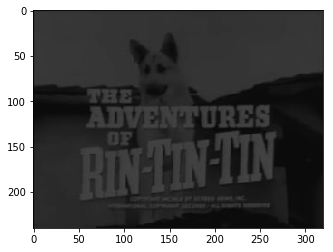

In [8]:
plt.imshow(rintin_gray, cmap="Greys_r", vmin=0, vmax=255)

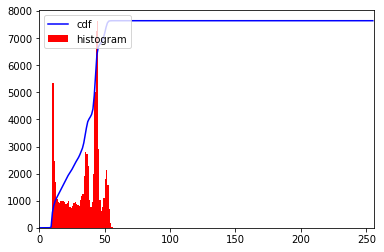

In [9]:

hist,bins = np.histogram(rintin_gray.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(rintin_gray.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

## Atividade 1

Realize as seguintes atividades:

1. O histograma fornecido aproveita bem as faixas de cores?
2. Equalize o histograma de maneira que a cumulativa seja uma função linear na diagonal do gráfico
3. Plote a imagem desenhada

### Respostas

1-) O histograma não aproveita bem as faixas de cores pois está num intervalo muito pequeno comparado ao total

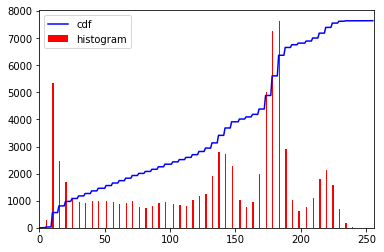

In [10]:
def transforma(pixel):
    return ((pixel - 8)/50)*255
matriz = []
lista =[]
for i in range(len(rintin_gray)):
    linha = rintin_gray[i]
    for p in linha:
        lista.append(transforma(p))
    matriz.append(lista)
    lista = []

matriz = np.asarray(matriz)
hist,bins = np.histogram(matriz.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(matriz.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

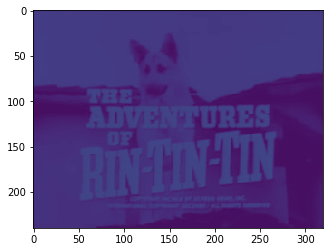

In [11]:
for i in range(len(rintin_gray)):
    linha = rintin_gray[i]
    for p in linha:
        p = transforma(p)
        
plt.imshow(rintin_gray, vmin=0, vmax=255)


## Atividade 2

Leia com a OpenCV a figura abaixo:

![](hall_box_battery1.jpg)

Separe os canais  R e B das imagens e analise seus histogramas.

1. A partir dos canais R e B e da análise do histograma é possível identificar a caixa vermelha e a bateria azul?

1. Crie uma imagem numpy em que somente os pixels da caixa vermelha estão brancos e faça seu plot aqui


In [12]:
img = cv2.imread("hall_box_battery1.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [13]:
img_r = img_rgb[:,:,0]
img_b = img_rgb[:,:,2]

In [14]:
hist,bins = np.histogram(img_b.flatten(),256,[0,256])

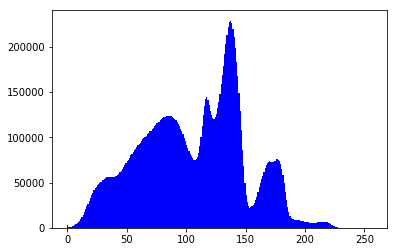

In [15]:
plt.hist(img_b.flatten(),256,[0,256], color = 'b')
plt.show()

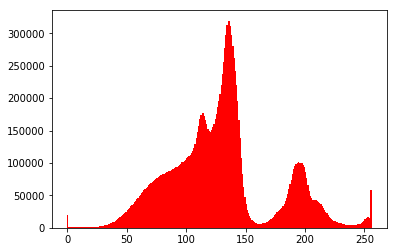

In [16]:
hist,bins = np.histogram(img_r.flatten(),256,[0,256])
plt.hist(img_r.flatten(),256,[0,256], color = 'r')
plt.show()

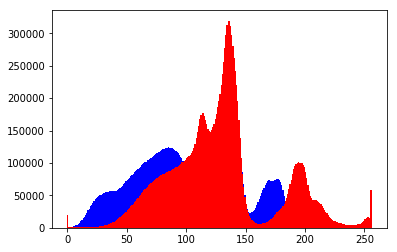

In [17]:
hist,bins = np.histogram(img_rgb.flatten(),256,[0,256])
plt.hist(img_b.flatten(),256,[0,256], color = 'b')
plt.hist(img_r.flatten(),256,[0,256], color = 'r')
plt.show()

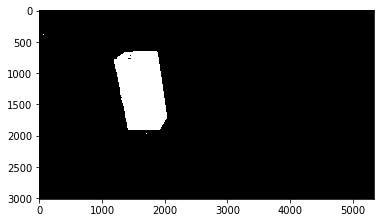

In [18]:
hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)
lower_red = np.array([0,150,20])
upper_red = np.array([10,255,255])
mask = cv2.inRange(hsv, lower_red, upper_red)
#plt.imshow(fig)
plt.imshow(mask, cmap="Greys_r")

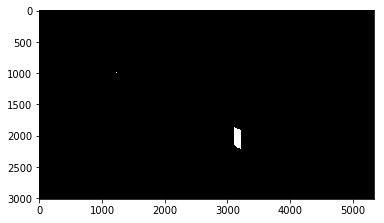

In [19]:
hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)
lower_blue = np.array([50,100,20])
upper_blue = np.array([255,255,255])
mask = cv2.inRange(hsv, lower_blue, upper_blue)
#plt.imshow(fig)
plt.imshow(mask, cmap="Greys_r")
cv2.destroyAllWindows()